<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Neural_Network_classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Making our Toy Dataset ready-:Basically its called toy dataset because its samller in size but its enough to practice our fundamentals...


In [40]:
import sklearn

In [41]:
from sklearn.datasets import make_circles #X is basically input features...and Y is the output label...
n_sample=1000
X,Y=make_circles(n_sample,
                noise=0.03,
                random_state=42)
print("First five sample of X:\n",X[:5])
print("First five sample of Y:",Y[:5])

First five sample of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five sample of Y: [1 1 1 1 0]


In [42]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":Y[:]})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


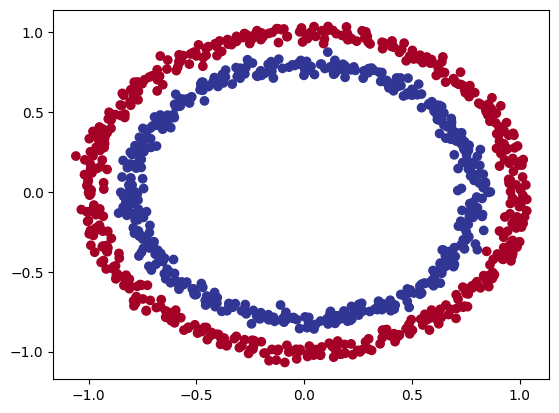

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y,
            cmap=plt.cm.RdYlBu)


###Turning out dataset to tensors and splitting it for training and testing:

In [44]:
X.shape,Y.shape

((1000, 2), (1000,))

In [45]:
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [46]:
#1.1:We have to convert a data into tensors first:
import torch
X=torch.from_numpy(X).type(torch.float32)
Y=torch.from_numpy(Y).type(torch.float32)
type(X),type(Y),X.shape,Y.shape
print(X.dtype,Y.dtype)

torch.float32 torch.float32


In [47]:
#1.2splitting our data for training and testing:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(800, 200, 800, 200)

**2. Building a model**

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [48]:
#1.device agnostic code:
device="cuda" if torch.cuda.is_available() else "cpu"
#2.subclassing nn.Module:# A small neural Network to handle our data:


Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`


In [49]:
import torch
from torch import nn
class circlemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_01=nn.Linear(in_features=2,out_features=5)#basically taking 2 features as input and scaling it to 5..
    self.layer_02=nn.Linear(in_features=5,out_features=1)#basically this layer will taking output from the first layer and after computation gives an output of 1 value..
  def forward(self,x):
    return self.layer_02(self.layer_01(x))#work=x->layer_1->layer_2->output

model=circlemodel().to(device)
model

circlemodel(
  (layer_01): Linear(in_features=2, out_features=5, bias=True)
  (layer_02): Linear(in_features=5, out_features=1, bias=True)
)

In [50]:
#there is another way to create our model with nn.sequential:
from torch import nn
model_=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_ #instead of creating our own forward method, nn.Sequential creates it for us...

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [51]:
model.state_dict()

OrderedDict([('layer_01.weight',
              tensor([[ 0.2501, -0.0952],
                      [-0.4795,  0.0819],
                      [-0.3674,  0.1768],
                      [ 0.6709, -0.3702],
                      [ 0.0008,  0.6458]], device='cuda:0')),
             ('layer_01.bias',
              tensor([-0.2759,  0.0842,  0.4010,  0.6125,  0.1441], device='cuda:0')),
             ('layer_02.weight',
              tensor([[ 0.2311, -0.0308,  0.0284, -0.0530,  0.4396]], device='cuda:0')),
             ('layer_02.bias', tensor([-0.0149], device='cuda:0'))])

In [52]:
model_.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6001, -0.2600],
                      [ 0.0153,  0.6861],
                      [-0.1926,  0.5581],
                      [ 0.1679, -0.1249],
                      [ 0.4662,  0.0823]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6298,  0.2180,  0.3692, -0.1090,  0.1479], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1052, -0.1533, -0.2889, -0.0129,  0.1418]], device='cuda:0')),
             ('1.bias', tensor([0.3077], device='cuda:0'))])

In [53]:
with torch.inference_mode():
  untrained_pred=model_(X_test.to(device))
print(f"Length of our predictions:{len(untrained_pred)},Shape of prediction:{untrained_pred.shape}")
print(f"Length of our test samples:{len(X_test)},Shape of testing data:{X_test.shape}")
print(f"first 10 predictions:{torch.round(untrained_pred[:10])}")
print(f"first 10 labels:{Y_test[:10]}")

Length of our predictions:200,Shape of prediction:torch.Size([200, 1])
Length of our test samples:200,Shape of testing data:torch.Size([200, 2])
first 10 predictions:tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')
first 10 labels:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


###Now we train our model for that first setup loss function and optimizer:

#so for regression we use nn.L1Loss()..what for regression.
###It it actually problem specific...
#Like for regression we use Mean squared error or Mean absolute error.
#For Classifiaction we use binary cross entropy or categorical cross entropy or simply cross entropy...

###for optimizer two most common is SGD and adam..

In [54]:
#setup of loss function:
loss_fn=nn.BCELoss()#logits must be passed through sigmoid activation layer prior to this...
# nn.Sequential=(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )==BCEwithLogitsLoss()
loss_fn=nn.BCEWithLogitsLoss()#BCEwithLogitsloss=sigmoid activation function is alreay built-in ...and why we choose this instead od BCEloss()..because it provide numerical stability....
#setup of optimizer:3optimizer bacically chages our parameters in such a way that loss function goes down...
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

##Calculating the accuracy--

In [55]:
#Accuracy is how many predictions your model got correct, out of all the predictions it made.
def Accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100

  return acc

In [56]:
#first make out logits->probabilites->labels(my taking the round off or using argmax())
#so the model output is needed to be passed from some kind of activation layer like for binary classification we have sigmoid and multiclass classification we have softmax classification..

In [57]:
#logits
model.eval()
with torch.inference_mode():
  y_pred=model(X_test.to(device))
print(y_pred[:5])
print(Y_test[:5])
#logits->probabilities:
y_pred_prob=torch.sigmoid(y_pred)
print(y_pred_prob[:5])
#probabilites->label:
y_pred_label=torch.round(y_pred_prob)
print(y_pred_label[:5])

tensor([[ 0.1449],
        [ 0.2342],
        [-0.1472],
        [ 0.2279],
        [-0.2393]], device='cuda:0')
tensor([1., 0., 1., 0., 1.])
tensor([[0.5362],
        [0.5583],
        [0.4633],
        [0.5567],
        [0.4404]], device='cuda:0')
tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.]], device='cuda:0')


#training loop:
#steps:1.forward pass 2. calculate the loss 3. zero_grad 4. loss backward(backward porgagation) 5. optimzer step(gradient descent..)

In [58]:
from ast import mod
#Building training and testing loop:
torch.cuda.manual_seed(42)
epochs=1000
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)
for epoch in range(epochs):
  #model training:
  model.train()
  #1.Forward Pass
  y_logits=model(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2.calculate the loss function:
  #loss=loss_fn(torch.sigmoid(y_logits),
  #             y_train)#for BCELoss()
  loss=loss_fn(y_logits,#becuse we need to pass logits to the loss functions not the probability values....#BCEwithLogitsLoss()
               Y_train)
  acc=Accuracy_fn(y_true=Y_train,
                  y_pred=y_pred)
  #3.optimizer zerograd():
  optimizer.zero_grad()

  #4.loss backward():
  loss.backward()

  #5.gradient decsent:
  optimizer.step()

  ###testing loop:
  model.eval()
  with torch.inference_mode():
    #1.Forward Pass:
    test_logits=model(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #2.Calculate the loss:
    test_loss=loss_fn(test_pred,Y_test)
    test_acc=Accuracy_fn(y_true=Y_test,
                      y_pred=test_pred)


  if epoch%10==0:
    print(f"Epoch:{epoch} | Training Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Testing Loss: {test_loss:.5f}, Accuarcy: {test_acc:.2f}")


Epoch:0 | Training Loss: 0.69595, Accuracy: 50.25% | Testing Loss: 0.77200, Accuarcy: 46.00
Epoch:10 | Training Loss: 0.69537, Accuracy: 50.38% | Testing Loss: 0.77131, Accuarcy: 46.50
Epoch:20 | Training Loss: 0.69498, Accuracy: 50.38% | Testing Loss: 0.77061, Accuarcy: 47.00
Epoch:30 | Training Loss: 0.69469, Accuracy: 50.88% | Testing Loss: 0.77301, Accuarcy: 47.00
Epoch:40 | Training Loss: 0.69446, Accuracy: 50.75% | Testing Loss: 0.77611, Accuarcy: 46.50
Epoch:50 | Training Loss: 0.69428, Accuracy: 50.88% | Testing Loss: 0.77421, Accuarcy: 47.00
Epoch:60 | Training Loss: 0.69413, Accuracy: 51.62% | Testing Loss: 0.77421, Accuarcy: 47.00
Epoch:70 | Training Loss: 0.69400, Accuracy: 51.12% | Testing Loss: 0.77611, Accuarcy: 46.50
Epoch:80 | Training Loss: 0.69389, Accuracy: 51.00% | Testing Loss: 0.77491, Accuarcy: 46.50
Epoch:90 | Training Loss: 0.69380, Accuracy: 51.00% | Testing Loss: 0.77681, Accuarcy: 46.00
Epoch:100 | Training Loss: 0.69372, Accuracy: 51.25% | Testing Loss: 0.

In [59]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


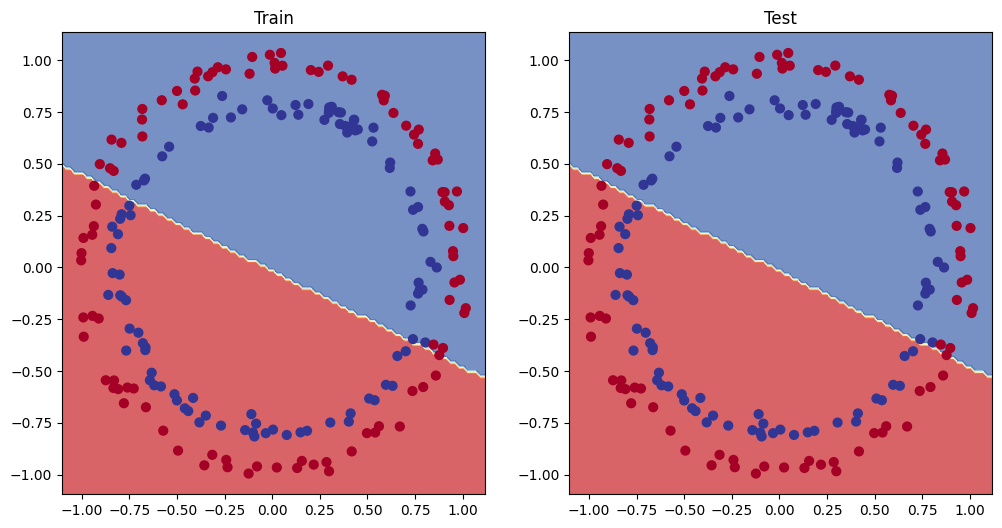

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_test,Y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,Y_test)
